<a href="https://colab.research.google.com/github/raheelahmadguraya/Intelligent-Systems-1/blob/main/ELE888_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv") #Reading data from

x = data['Midterm mark']
y = data['Final mark']


In [ ]:
def standardization(feature):
  feature_mean = int(np.mean(feature))
  feature_stdev = int(np.std(feature))

  feature_stnd = (feature - feature_mean) / feature_stdev

  return feature_stnd

In [ ]:
def cost(x, y, m, b, iteration):
  m_new = m
  b_new = b
  C = np.zeros(iteration)

  for i in range(iteration):
    C[i] = (1 / len(x)) * sum((y - ((m_new * x) + b_new)) ** 2)
    gpdm = (2 / len(x)) * sum(-x * (y - ((m_new * x) + b_new)))
    gpdb = (2 / len(x)) * sum(-(y - ((m_new * x) + b_new)))
    m_new = m_new - (alpha * gpdm)
    b_new = b_new - (alpha * gpdb)

  return C

In [ ]:
def GPD(m, b, x, y):

  m_new = m
  b_new = b
  gpdm = (2 / len(x)) * sum(-x * (y-((m_new * x) + b_new)))
  gpdb = (2 / len(x)) * sum(-(y - ((m_new * x) + b_new)))

  return gpdm, gpdb

In [ ]:
def update(m, b, alpha, x, y, iteration):
  m_new = m
  b_new = b

  for i in range(iteration):
    gpd =  GPD(m_new, b_new, x, y)
    gpdm = gpd[0]
    gpdb = gpd[1]
    m_new = m_new - (alpha * gpdm)
    b_new = b_new - (alpha * gpdb)
  return m_new, b_new

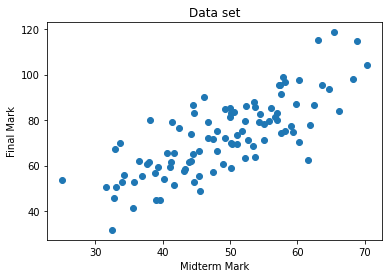

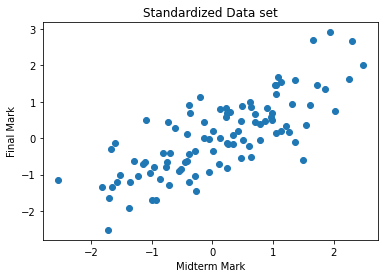

In [ ]:
#Feature Standardization
x_stnd = standardization(x)
y_stnd = standardization(y)

x = x.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

x_stnd = x_stnd.values.reshape(-1, 1)
y_stnd = y_stnd.values.reshape(-1, 1)

plt.scatter(x,y)
plt.xlabel("Midterm Mark")
plt.ylabel("Final Mark")
plt.title("Data set")
plt.show()

plt.scatter(x_stnd,y_stnd)
plt.xlabel("Midterm Mark")
plt.ylabel("Final Mark")
plt.title("Standardized Data set")
plt.show()

*Initial Regression Line (m = -0.5, b = 0)*


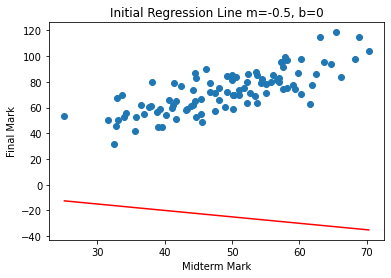

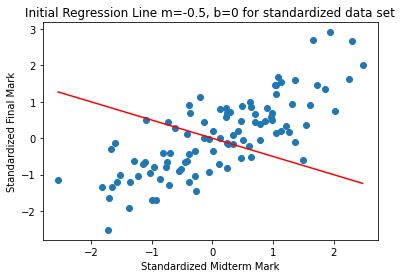

In [ ]:
m = -0.5 #initial m
b = 0 #initial b

x_reg = np.linspace(min(x), max(x), 300)
y_reg = (m * x_reg) + b

plt.plot(x_reg, y_reg, '-r')
plt.xlabel("Midterm Mark")
plt.ylabel("Final Mark")
plt.title("Initial Regression Line m=-0.5, b=0")
plt.scatter(x,y)
plt.show()

x_reg = np.linspace(min(x_stnd), max(x_stnd), 300)
y_reg = (m * x_reg) + b

plt.plot(x_reg, y_reg, '-r')
plt.xlabel("Standardized Midterm Mark")
plt.ylabel("Standardized Final Mark")
plt.title("Initial Regression Line m=-0.5, b=0 for standardized data set")
plt.scatter(x_stnd,y_stnd)
plt.show()

*Regression Line after performing Gradient descent algorithm for 100 iterations with learning rate of 0.0001*

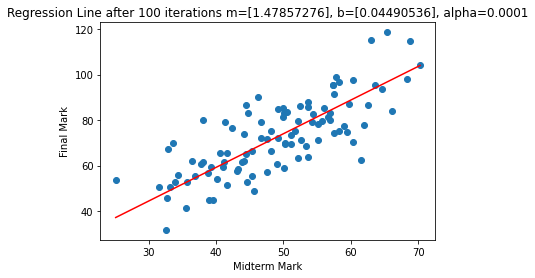

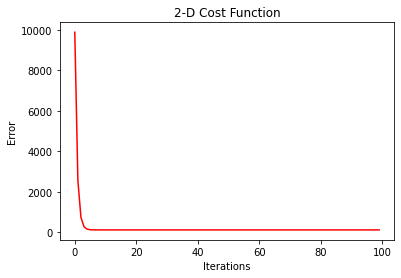

Error: 112.7607586464164


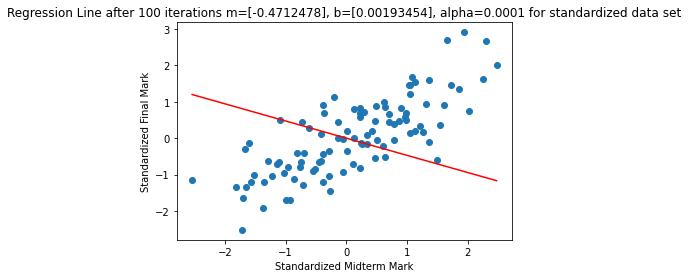

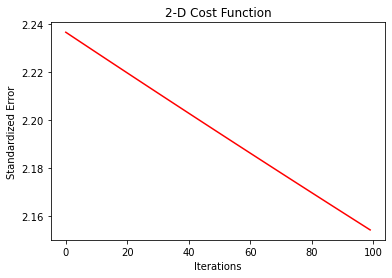

Error: 2.154384479285958


In [ ]:
#Regression line after updating m, b 100 times with learning rate alpha = 0.0001

m = -0.5 #initial m
b = 0 #initial b
alpha = 0.0001 #learning rate

#updating m and b for non-standardized dataset
line_params = update(m, b, alpha, x, y, 100)
m_new = line_params[0]
b_new = line_params[1]

#Non-standardized dataset
x_reg = np.linspace(min(x), max(x), 300)
y_reg = (m_new * x_reg) + b_new
plt.plot(x_reg, y_reg, '-r')
plt.xlabel("Midterm Mark")
plt.ylabel("Final Mark")
plt.title("Regression Line after 100 iterations m={}, b={}, alpha={}".format(m_new, b_new, alpha))
plt.scatter(x,y)
plt.show()

#Non-standardized Error plot
E = cost(x, y, m, b, 100)
i = range(100)
plt.plot(i, E, '-r')
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("2-D Cost Function")
plt.show()
print("Error:", E[99])

#updating m and b for standardized dataset
line_params_stnd = update(m, b, alpha, x_stnd, y_stnd, 100)
m_new_stnd = line_params_stnd[0]
b_new_stnd = line_params_stnd[1]

#Standardized dataset
x_reg = np.linspace(min(x_stnd), max(x_stnd), 300)
y_reg = (m_new_stnd * x_reg) + b_new_stnd
plt.plot(x_reg, y_reg, '-r')
plt.xlabel("Standardized Midterm Mark")
plt.ylabel("Standardized Final Mark")
plt.title("Regression Line after 100 iterations m={}, b={}, alpha={} for standardized data set".format(m_new_stnd, b_new_stnd, alpha))
plt.scatter(x_stnd,y_stnd)
plt.show()

#Standardized Error plot
E_stnd = cost(x_stnd, y_stnd, m, b, 100)
i = range(100)
plt.plot(i, E_stnd, '-r')
plt.xlabel("Iterations")
plt.ylabel("Standardized Error")
plt.title("2-D Cost Function")
plt.show()
print("Error:", E_stnd[99])

*Regression Line after performing Gradient descent algorithm for 2000 iterations with learning rate of 0.0001*

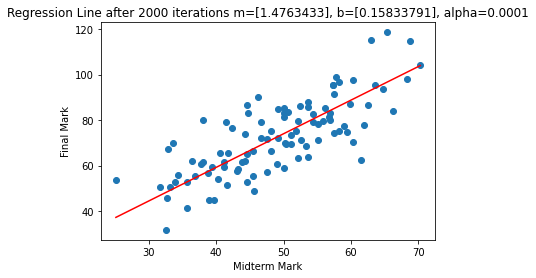

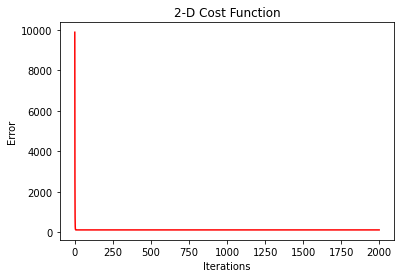

Error: 112.69300981153623


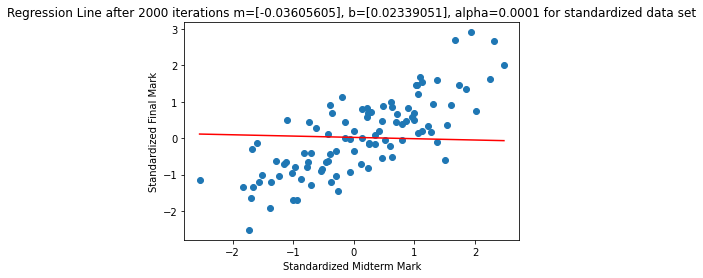

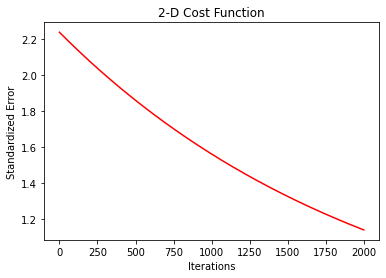

Error: 1.137929521032369


In [ ]:
#Regression line after updating m, b 2000 times with learning rate alpha = 0.0001

m = -0.5 #initial m
b = 0 #initial b
alpha = 0.0001 #learning rate

#updating m and b for non-standardized dataset
line_params = update(m, b, alpha, x, y, 2000)
m_new = line_params[0]
b_new = line_params[1]

#Non-standardized dataset
x_reg = np.linspace(min(x), max(x), 300)
y_reg = (m_new * x_reg) + b_new
plt.plot(x_reg, y_reg, '-r')
plt.xlabel("Midterm Mark")
plt.ylabel("Final Mark")
plt.title("Regression Line after 2000 iterations m={}, b={}, alpha={}".format(m_new, b_new, alpha))
plt.scatter(x,y)
plt.show()

#Non-standardized Error plot
E = cost(x, y, m, b, 2000)
i = range(2000)
plt.plot(i, E, '-r')
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("2-D Cost Function")
plt.show()
print("Error:", E[1999])

#updating m and b for standardized dataset
line_params_stnd = update(m, b, alpha, x_stnd, y_stnd, 2000)
m_new_stnd = line_params_stnd[0]
b_new_stnd = line_params_stnd[1]

#Standardized dataset
x_reg = np.linspace(min(x_stnd), max(x_stnd), 300)
y_reg = (m_new_stnd * x_reg) + b_new_stnd
plt.plot(x_reg, y_reg, '-r')
plt.xlabel("Standardized Midterm Mark")
plt.ylabel("Standardized Final Mark")
plt.title("Regression Line after 2000 iterations m={}, b={}, alpha={} for standardized data set".format(m_new_stnd, b_new_stnd, alpha))
plt.scatter(x_stnd,y_stnd)
plt.show()

#Standardized Error plot
E_stnd = cost(x_stnd, y_stnd, m, b, 2000)
i = range(2000)
plt.plot(i, E_stnd, '-r')
plt.xlabel("Iterations")
plt.ylabel("Standardized Error")
plt.title("2-D Cost Function")
plt.show()
print("Error:", E_stnd[1999])

*Linear Regression using scikit-learn*

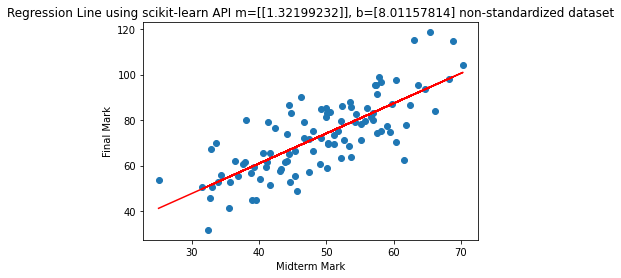

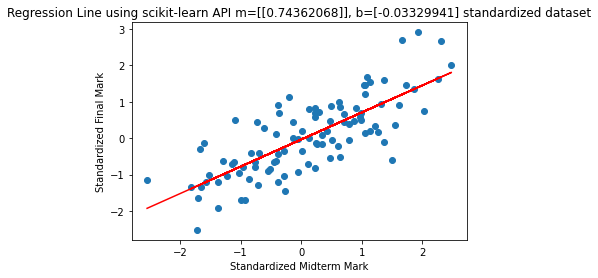

In [ ]:
lin_reg = LinearRegression()
lin_reg_model = lin_reg.fit(x, y)
model_predict = lin_reg_model.predict(x)

plt.xlabel("Midterm Mark")
plt.ylabel("Final Mark")
plt.scatter(x, y)
plt.title("Regression Line using scikit-learn API m={}, b={} non-standardized dataset".format(lin_reg_model.coef_, lin_reg_model.intercept_))
plt.plot(x, model_predict, '-r')
plt.show()

lin_reg_stnd = LinearRegression()
lin_reg_model_stnd = lin_reg.fit(x_stnd, y_stnd)
model_predict_stnd = lin_reg_model_stnd.predict(x_stnd)

plt.xlabel("Standardized Midterm Mark")
plt.ylabel("Standardized Final Mark")
plt.scatter(x_stnd, y_stnd)
plt.title("Regression Line using scikit-learn API m={}, b={} standardized dataset".format(lin_reg_model.coef_, lin_reg_model.intercept_))
plt.plot(x_stnd, model_predict_stnd, '-r')
plt.show()

*Regression Line after performing Gradient descent algorithm for 100 iterations with learning rate of 0.1*


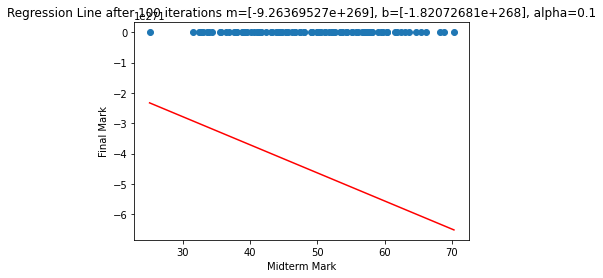

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in square
  import sys


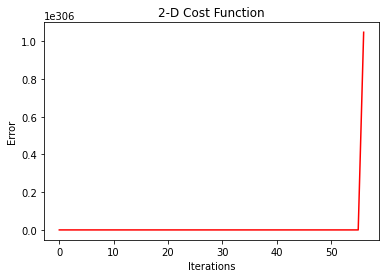

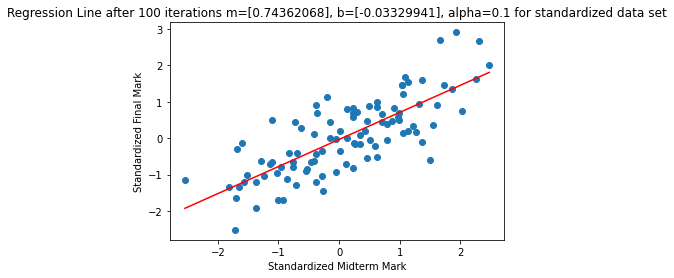

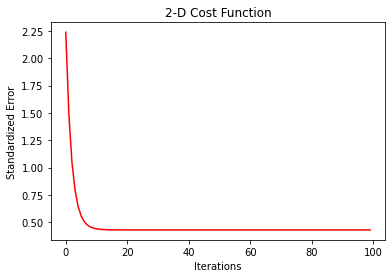

In [ ]:
#Regression line after updating m, b 100 times with learning rate alpha = 0.1

m = -0.5 #initial m
b = 0 #initial b
alpha = 0.1 #learning rate

#updating m and b for non-standardized dataset
line_params = update(m, b, alpha, x, y, 100)
m_new = line_params[0]
b_new = line_params[1]

#Non-standardized dataset
x_reg = np.linspace(min(x), max(x), 300)
y_reg = (m_new * x_reg) + b_new
plt.plot(x_reg, y_reg, '-r')
plt.xlabel("Midterm Mark")
plt.ylabel("Final Mark")
plt.title("Regression Line after 100 iterations m={}, b={}, alpha={}".format(m_new, b_new, alpha))
plt.scatter(x,y)
plt.show()

#Non-standardized Error plot
E = cost(x, y, m, b, 100)
i = range(100)
plt.plot(i, E, '-r')
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("2-D Cost Function")
plt.show()

#updating m and b for standardized dataset
line_params_stnd = update(m, b, alpha, x_stnd, y_stnd, 100)
m_new_stnd = line_params_stnd[0]
b_new_stnd = line_params_stnd[1]

#Standardized dataset
x_reg = np.linspace(min(x_stnd), max(x_stnd), 300)
y_reg = (m_new_stnd * x_reg) + b_new_stnd
plt.plot(x_reg, y_reg, '-r')
plt.xlabel("Standardized Midterm Mark")
plt.ylabel("Standardized Final Mark")
plt.title("Regression Line after 100 iterations m={}, b={}, alpha={} for standardized data set".format(m_new_stnd, b_new_stnd, alpha))
plt.scatter(x_stnd,y_stnd)
plt.show()

#Standardized Error plot
E_stnd = cost(x_stnd, y_stnd, m, b, 100)
i = range(100)
plt.plot(i, E_stnd, '-r')
plt.xlabel("Iterations")
plt.ylabel("Standardized Error")
plt.title("2-D Cost Function")
plt.show()

*Regression Line after performing Gradient descent algorithm for 2000 iterations with learning rate of 0.1*

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in multiply
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in add
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in subtract
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in subtract
  # Remove the CWD from sys.path while we load stuff.


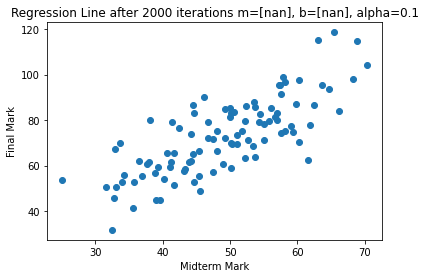

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in square
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in multiply
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in add
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in subtract
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in subtract
  # This is added back by InteractiveShellApp.init_path()


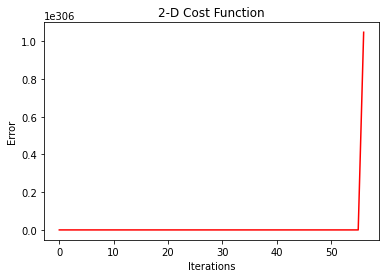

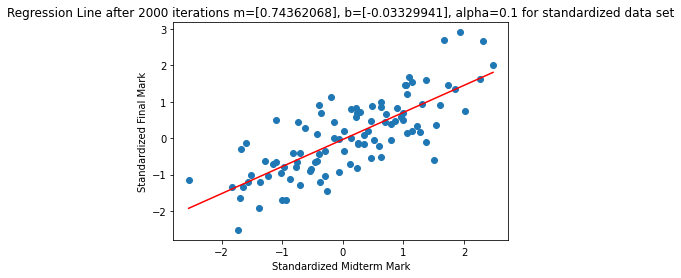

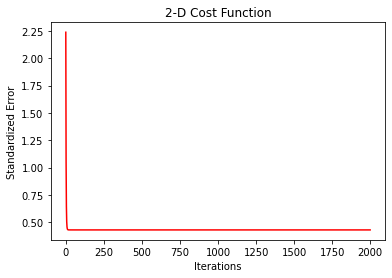

In [ ]:
#Regression line after updating m, b 2000 times with learning rate alpha = 0.1

m = -0.5 #initial m
b = 0 #initial b
alpha = 0.1 #learning rate

E = np.zeros(100)
E_std = np.zeros(100)

#updating m and b for non-standardized dataset
line_params = update(m, b, alpha, x, y, 2000)
m_new = line_params[0]
b_new = line_params[1]

#Non-standardized dataset
x_reg = np.linspace(min(x), max(x), 300)
y_reg = (m_new * x_reg) + b_new
plt.plot(x_reg, y_reg, '-r')
plt.xlabel("Midterm Mark")
plt.ylabel("Final Mark")
plt.title("Regression Line after 2000 iterations m={}, b={}, alpha={}".format(m_new, b_new, alpha))
plt.scatter(x,y)
plt.show()

#Non-Standardized Error plot
E = cost(x, y, m, b, 2000)
i = range(2000)
plt.plot(i, E, '-r')
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("2-D Cost Function")
plt.show()

#updating m and b for standardized dataset
line_params_stnd = update(m, b, alpha, x_stnd, y_stnd, 2000)
m_new_stnd = line_params_stnd[0]
b_new_stnd = line_params_stnd[1]

#Standardized dataset
x_reg = np.linspace(min(x_stnd), max(x_stnd), 300)
y_reg = (m_new_stnd * x_reg) + b_new_stnd
plt.plot(x_reg, y_reg, '-r')
plt.xlabel("Standardized Midterm Mark")
plt.ylabel("Standardized Final Mark")
plt.title("Regression Line after 2000 iterations m={}, b={}, alpha={} for standardized data set".format(m_new_stnd, b_new_stnd, alpha))
plt.scatter(x_stnd,y_stnd)
plt.show()

#Standardized Error plot
E_stnd = cost(x_stnd, y_stnd, m, b, 2000)
i = range(2000)
plt.plot(i, E_stnd, '-r')
plt.xlabel("Iterations")
plt.ylabel("Standardized Error")
plt.title("2-D Cost Function")
plt.show()